In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

In [6]:
print(data.head())

                                               title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4  Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45        

In [7]:
# Check for missing values
print(data.isnull().sum())


title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [8]:
# Fill missing values or drop rows/columns with missing values
data = data.fillna(method='ffill')  # Forward fill for missing values


In [9]:
# Display the first few rows of the cleaned dataset
print(data.head())


                                               title  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...   
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...   
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...   
3  Hot Summer Cool T-shirt pour les femmes Mode T...   
4  Femmes Shorts d'été à lacets taille élastique ...   

                                          title_orig  price  retail_price  \
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  16.00            14   
1   Women's Casual Summer Sleeveless Sexy Mini Dress   8.00            22   
2  2020 New Arrival Women Spring and Summer Beach...   8.00            43   
3  Hot Summer Cool T Shirt for Women Fashion Tops...   8.00             8   
4  Women Summer Shorts Lace Up Elastic Waistband ...   2.72             3   

  currency_buyer  units_sold  uses_ad_boosts  rating  rating_count  \
0            EUR         100               0    3.76            54   
1            EUR       20000               1    3.45        

In [10]:
# Summary statistics
print(data.describe())


             price  retail_price     units_sold  uses_ad_boosts       rating  \
count  1573.000000   1573.000000    1573.000000     1573.000000  1573.000000   
mean      8.325372     23.288620    4339.005086        0.432931     3.820896   
std       3.932030     30.357863    9356.539302        0.495639     0.515374   
min       1.000000      1.000000       1.000000        0.000000     1.000000   
25%       5.810000      7.000000     100.000000        0.000000     3.550000   
50%       8.000000     10.000000    1000.000000        0.000000     3.850000   
75%      11.000000     26.000000    5000.000000        1.000000     4.110000   
max      49.000000    252.000000  100000.000000        1.000000     5.000000   

       rating_count  rating_five_count  rating_four_count  rating_three_count  \
count   1573.000000        1573.000000        1573.000000         1573.000000   
mean     889.659250         443.279085         179.595041          134.452003   
std     1983.928834         975.0903

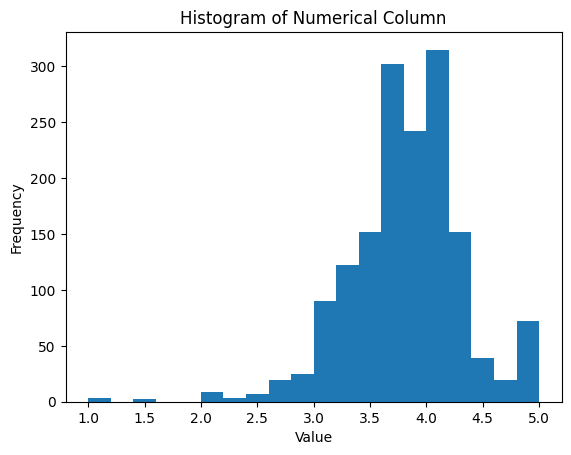

In [15]:
# Histogram of a specific column
plt.hist(data['rating'], bins=20)
plt.title('Histogram of Numerical Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


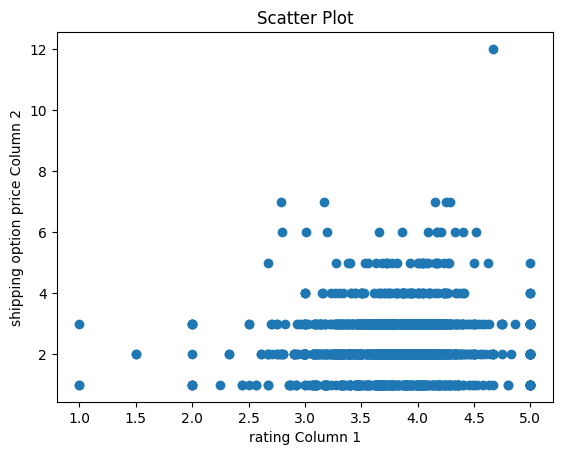

In [16]:
# Scatter plot between two numerical columns
plt.scatter(data['rating'], data['shipping_option_price'])
plt.title('Scatter Plot')
plt.xlabel('rating Column 1')
plt.ylabel('shipping option price Column 2')
plt.show()


In [19]:
data.aggregate('rating')

0       3.76
1       3.45
2       3.57
3       4.03
4       3.10
        ... 
1568    4.08
1569    3.07
1570    3.71
1571    2.50
1572    4.07
Name: rating, Length: 1573, dtype: float64

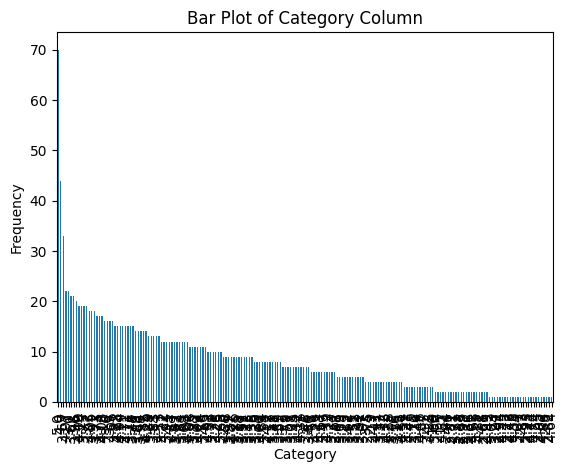

In [17]:
# Bar plot for categorical data
data['rating'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Category Column')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


In [23]:
total_inventory = data['inventory_total'].sum()
print(total_inventory)

78369


In [24]:
data.all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
1568    False
1569    False
1570    False
1571    False
1572    False
Length: 1573, dtype: bool

In [25]:
# prompt: hypothesis test

from scipy.stats import ttest_ind

# Define the two groups of data
group1 = data[data['rating'] >= 3.5]['inventory_total']
group2 = data[data['rating'] < 3.5]['inventory_total']

# Perform the independent t-test
t_statistic, p_value = ttest_ind(group1, group2)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in inventory total between the two groups (p-value = {})".format(p_value))
else:
    print("There is no statistically significant difference in inventory total between the two groups (p-value = {})".format(p_value))


There is no statistically significant difference in inventory total between the two groups (p-value = 0.35509889216366586)


Mean squared error: 6.545218476406298


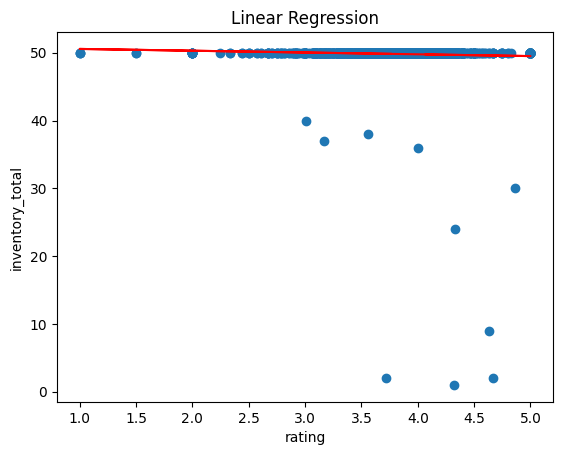

In [26]:
# prompt: linear regression

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the independent and dependent variables
X = data[['rating']]
y = data['inventory_total']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print("Mean squared error:", mse)

# Plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.title('Linear Regression')
plt.xlabel('rating')
plt.ylabel('inventory_total')
plt.show()


Accuracy: 0.9936427209154481


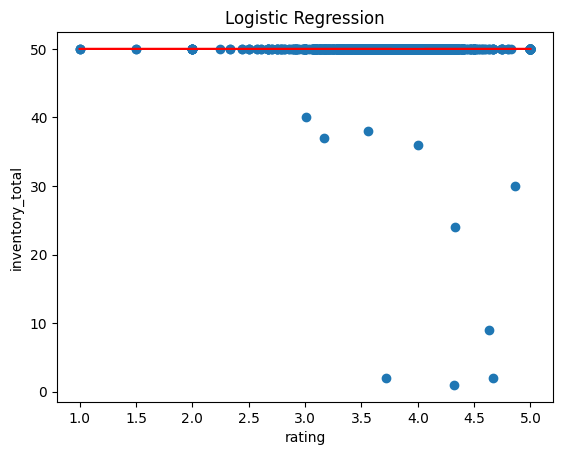

In [27]:
# prompt: logistic regression

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Define the independent and dependent variables
X = data[['rating']]
y = data['inventory_total']

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
accuracy = model.score(X, y)
print("Accuracy:", accuracy)

# Plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.title('Logistic Regression')
plt.xlabel('rating')
plt.ylabel('inventory_total')
plt.show()


Accuracy: 0.9942784488239034


IndexError: list index out of range

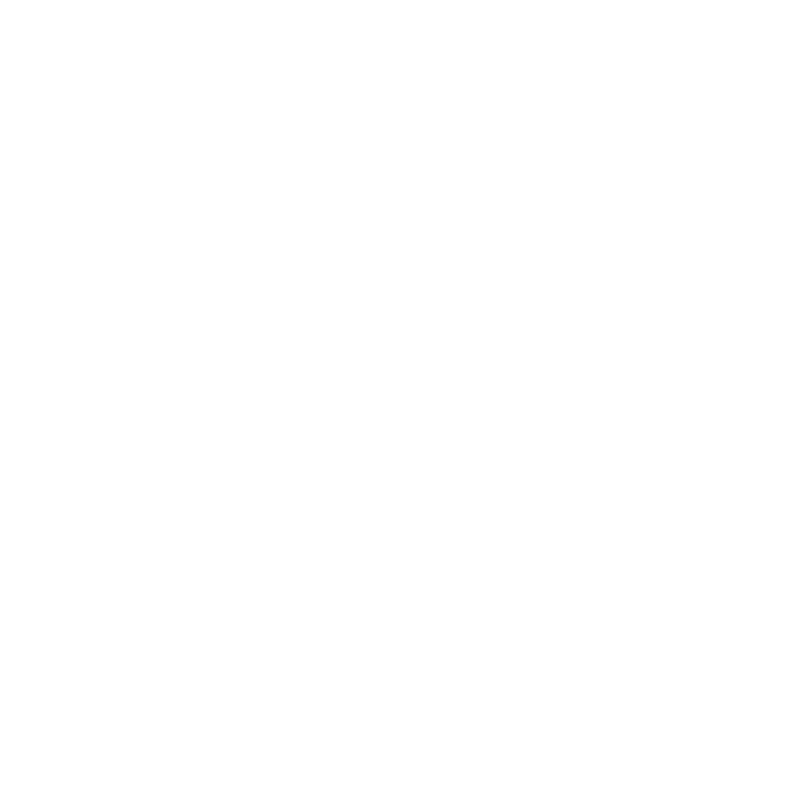

In [28]:
# prompt: Decision Trees

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Define the independent and dependent variables
X = data[['rating']]
y = data['inventory_total']

# Create a decision tree model
model = DecisionTreeClassifier()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
accuracy = model.score(X, y)
print("Accuracy:", accuracy)

# Visualize the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(model, feature_names=['rating'], class_names=['low', 'high'], fontsize=10, filled=True)
plt.show()


In [29]:
# prompt: Naive Bayes

import pandas as pd
# Define the independent and dependent variables
X = data[['rating']]
y = data['inventory_total']

# Convert the target variable to categorical
y = pd.Categorical(y).codes

# Create a Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9554990464081373


In [30]:
# prompt: Random Forest complete code

# Define the independent and dependent variables
X = data[['rating']]
y = data['inventory_total']

# Create a Random Forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

# Feature Importance
importances = model.feature_importances_
features = X.columns
for i, feature in enumerate(features):
    print(f"{feature}: {importances[i]}")



NameError: name 'RandomForestClassifier' is not defined

In [31]:
# prompt: Support Vector Machines

from sklearn.svm import SVC

# Define the independent and dependent variables
X = data[['rating']]
y = data['inventory_total']

# Create a support vector machine model
model = SVC()

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9936427209154481


In [32]:
# prompt: K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

# Define the independent and dependent variables
X = data[['rating']]
y = data['inventory_total']

# Create a KNN model
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the data
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9936427209154481


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]
[[ 3.81957774 50.        ]
 [ 4.335       3.5       ]
 [ 3.82166667 34.16666667]]


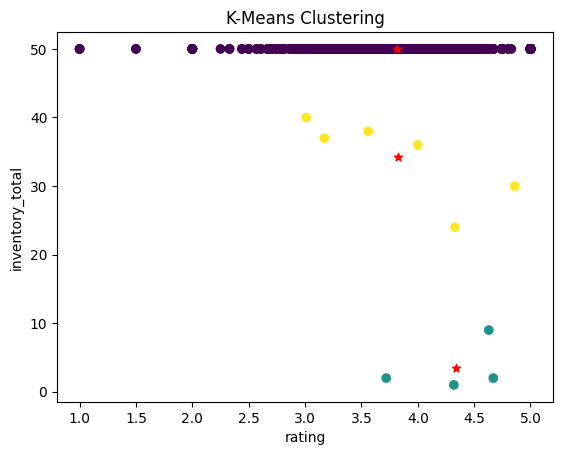

In [33]:
# prompt: K-Means

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the data
X = data[['rating', 'inventory_total']]

# Choose the number of clusters
num_clusters = 3

# Create the KMeans model
model = KMeans(n_clusters=num_clusters)

# Fit the model to the data
model.fit(X)

# Get the cluster labels
labels = model.labels_

# Get the cluster centers
centers = model.cluster_centers_

# Print the cluster labels and centers
print(labels)
print(centers)

# Visualize the clusters
plt.scatter(X['rating'], X['inventory_total'], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', color='red')
plt.title('K-Means Clustering')
plt.xlabel('rating')
plt.ylabel('inventory_total')
plt.show()


In [34]:
# prompt:  Artificial Neural Networks

import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions)
print("Mean squared error:", mse)



Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 2)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 2), dtype=float64)
      • training=True
      • mask=None


In [35]:
# prompt: Data Science analysis

import pandas as pd
import matplotlib.pyplot as plt
# Perform data cleaning and preprocessing
data = data.dropna()
data['rating'] = data['rating'].astype(float)
data['inventory_total'] = data['inventory_total'].astype(float)

# Perform exploratory data analysis
data.describe()
data.corr()

# Visualize the data
plt.hist(data['rating'])
plt.scatter(data['rating'], data['inventory_total'])

# Build a linear regression model
X = data[['rating']]
y = data['inventory_total']
model = LinearRegression()
model.fit(X, y)

# Evaluate the model
model.score(X, y)

# Make predictions
new_data = {'rating': [4.0, 4.5, 5.0]}
predicted_inventory = model.predict(pd.DataFrame(data=new_data))

# Conclusion
print("Based on the data analysis, there is a positive correlation between rating and inventory total. The linear regression model explains {}% of the variance in inventory total.".format(model.score(X, y) * 100))


<ipython-input-35-cf835fb9d615>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].astype(float)
<ipython-input-35-cf835fb9d615>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['inventory_total'] = data['inventory_total'].astype(float)


ValueError: could not convert string to float: 'Women Fashion Loose Lace Blouse Blouse V Neck Bat Sleeves T Shirt Hollow Out Tops Plus Grande Taille XS-8XL'